# EDA to understand the data first

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.head()
# df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [5]:
df_train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          

In [6]:
df_train.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12        

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df_train.dtypes
# theres a lot of actual data vs just objects

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [9]:
quant = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
qual = [f for f in df_train.columns if df_train.dtypes[f] == 'object']
quant.remove('SalePrice')
quant.remove('Id')
print('# of qualitative features: ' + str(len(qual)))
print('# of quantitative features: ' + str(len(quant)))

# of qualitative features: 43
# of quantitative features: 36


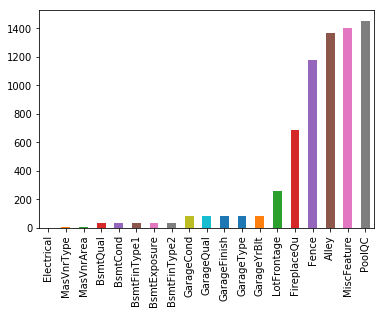

In [10]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

This shows that quite a number of attributes have NA. Like PoolQC because there either is a pool or isn't. 

In [11]:
print("Quantitative features missing values:" + str([k for k in missing.keys() if k in quant]))
print("Qualitative features missing values:" + str([k for k in missing.keys() if k in qual]))


Quantitative features missing values:['MasVnrArea', 'GarageYrBlt', 'LotFrontage']
Qualitative features missing values:['Electrical', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']


The qualitative ones make sense. The quantitative ones like garageYrBlt would be irrelevant if there isn't a garage

c:\users\aznro\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


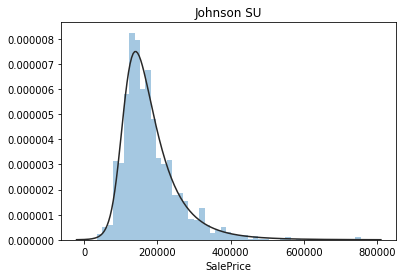

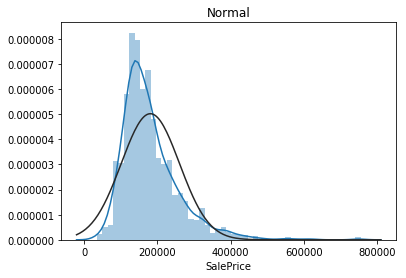

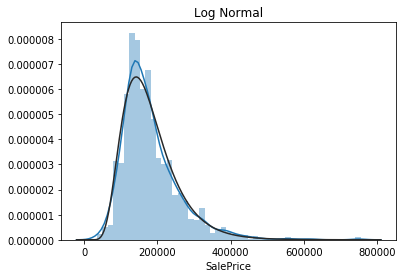

In [12]:
import scipy.stats as st
y = df_train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=True, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=True, fit=st.lognorm)

We find that the data does not follow a normal distribution and looks hella closer to the log norm and especially the johnsonsu

In [13]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1]<0.01
normal = df_train[quant]
normal = normal.apply(test_normality)
print(not normal.any())

False


This shows that none of the quantitative variables have normal distributions so these should be transformed too

c:\users\aznro\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


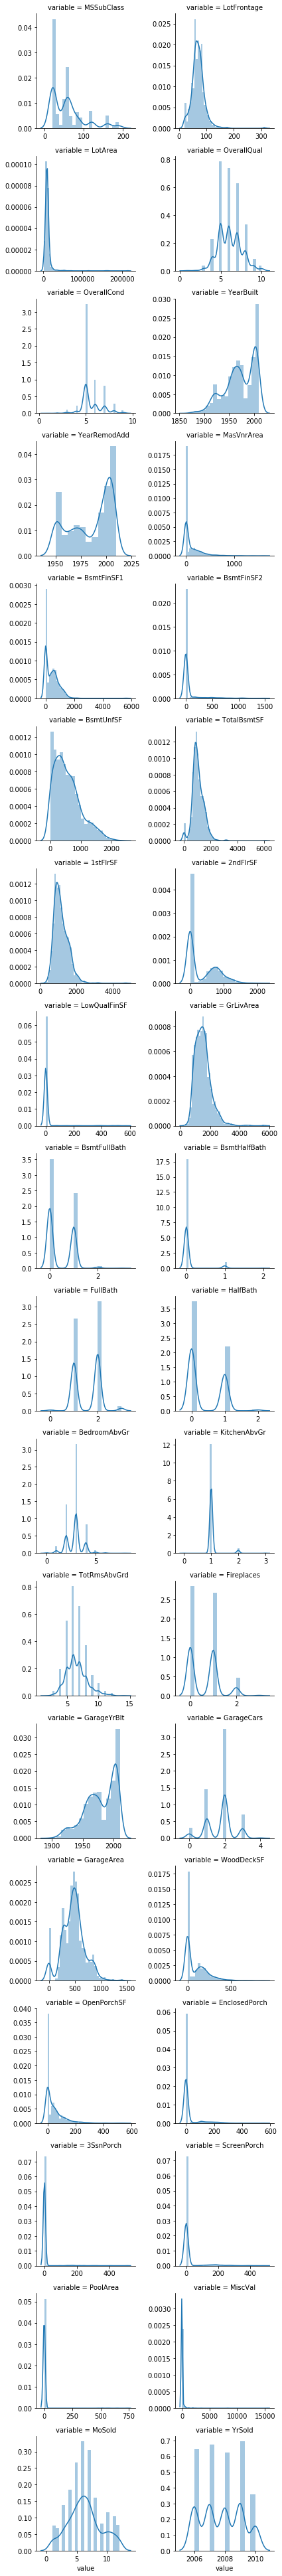

In [14]:
f = pd.melt(df_train, value_vars=quant)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

independent variables like TotalBsmt, KitchenAbvGr, LotFrontage look good for log transform. 

## Categorical data
For qualitative variables we can try two methods. 
1. check distribution of SalePrice with respect to variable values and enumerate them. 
2. create dummy variable for each possible category

c:\users\aznro\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


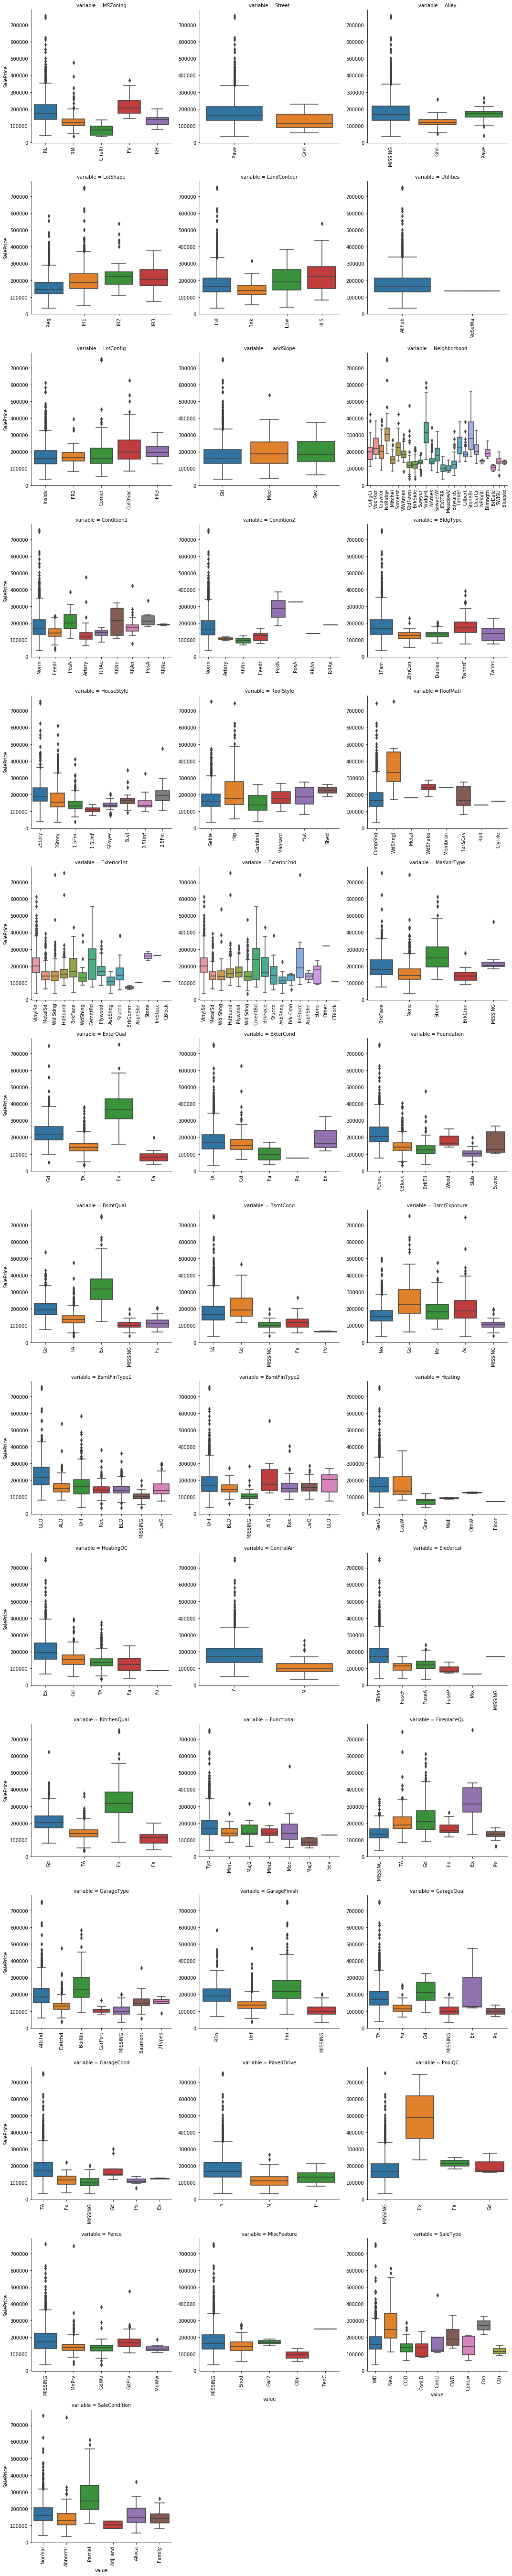

In [15]:
for c in qual:
    # transform the data type of the feature variables to category
    df_train[c] = df_train[c].astype('category') 
    # df_train[c].cat.categories # shows categories
    if df_train[c].isnull().any():
        # add new category. For PoolQC we had Ex, Gd, Ta, Na, but Na wasn't used
        df_train[c] = df_train[c].cat.add_categories(['MISSING'])
        # fill in the Nan's with that category
        df_train[c] = df_train[c].fillna('MISSING')
        
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
# melt only the qualitative features and get corresponding saleprice
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=qual)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

We see lots of diversity regarding the categories and saleprice. Some like lotShape has a straightforward linear relationship. Partial sale condition brings a high sale price. Some neighborhoods have really big influences. a pool in excellent shape increases the saleprice a lot

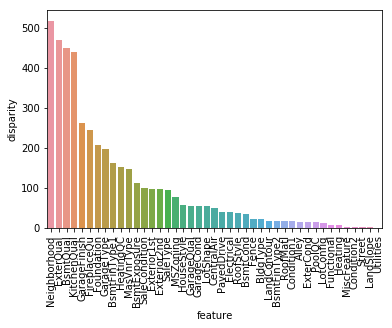

In [16]:
# anova tells us if all the means of every feature is equal to one another
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qual
    pvals = []
    for c in qual:
        samples = []
        # For each category in each qualitative independent variable. In PoolQC we have four categories: Missing, Ex, Gd...
        for cats in df_train[c].unique():
            # Get the saleprice of the data that matches the category
            s = df_train[df_train[c] == cats]['SalePrice'].values
            samples.append(s)
        # performs anova on each independent qualitative variable. Like the 4 categores in PoolQC gives one p-value for PoolQC
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')
anova_tests = anova(df_train)
anova_tests['disparity'] = np.log(1./anova_tests['pval'].values)
sns.barplot(data=anova_tests, x='feature', y='disparity')
x=plt.xticks(rotation=90)

I can't tell if we are dealing with a normal distribution for the population for each independent variable. So instead of using ANOVA, I'll use its non-parametric version: Kruskal. 

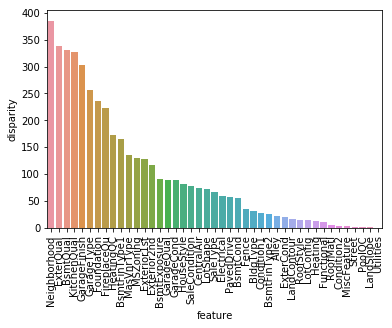

In [17]:
# anova tells us if all the means of every feature is equal to one another
def kruskal(frame):
    kru = pd.DataFrame()
    kru['feature'] = qual
    pvals = []
    for c in qual:
        samples = []
        # For each category in each qualitative independent variable. In PoolQC we have four categories: Missing, Ex, Gd...
        for cats in df_train[c].unique():
            # Get the saleprice of the data that matches the category
            s = df_train[df_train[c] == cats]['SalePrice'].values
            samples.append(s)
        # performs anova on each independent qualitative variable. Like the 4 categores in PoolQC gives one p-value for PoolQC
        pval = stats.kruskal(*samples)[1]
        pvals.append(pval)
    kru['pval'] = pvals
    return kru.sort_values('pval')
k = kruskal(df_train)
k['disparity'] = np.log(1./k['pval'].values)
sns.barplot(data=k, x='feature', y='disparity')
x=plt.xticks(rotation=90)

Kruskal tests medians instead of means

In [18]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    # should probably just enumerate here instead
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qual:  
    encode(df_train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


Encode all the qualitative categories. The extra categories are then added to the actual categories in df_train

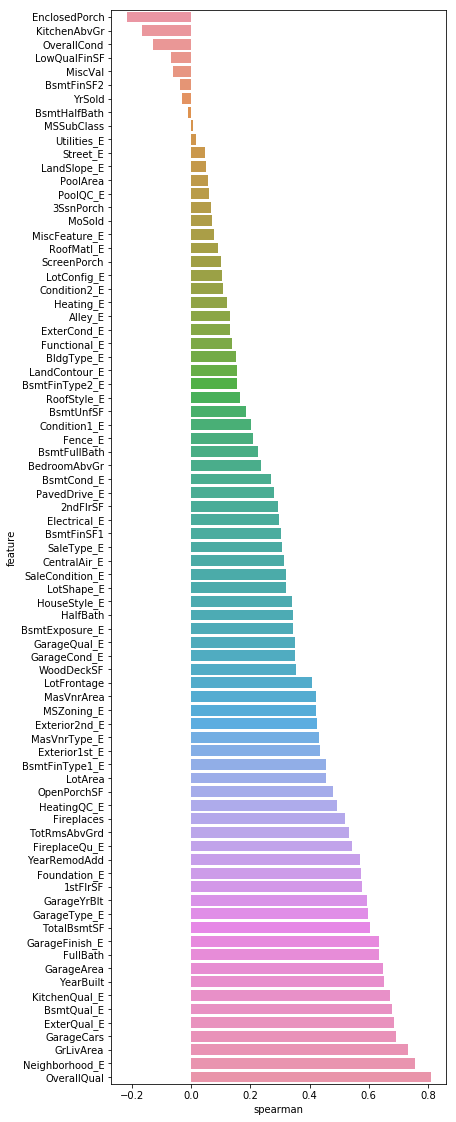

In [19]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quant + qual_encoded
spearman(df_train, features)

From the plot, we can see that overall quality and neighborhood heavily correlate with SalePrice. Spearman correlation works better in this case since it picks up non-linear relationships between variables. We can also see that variables like neighborhood are probably confounding variables.

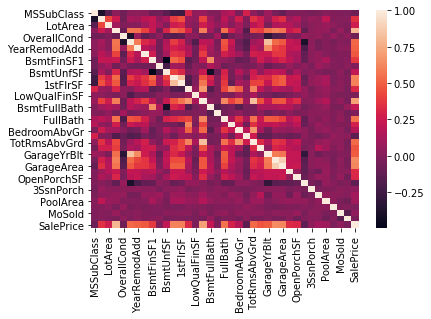

In [20]:
plt.figure(1)
corr = df_train[quant+['SalePrice']].corr()
sns.heatmap(corr)


A correlation matrix of saleprice and all the quantitative variables. The only ones that stand out are the fact that the basement sq ft. is the same as 1st floor sq.ft. which is normal. Also, the garage year built and the garage area. 

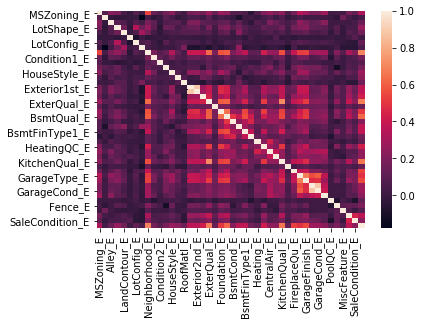

In [21]:
plt.figure(2)
corr = df_train[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)

A correlation matrix of saleprice and all the quantitative variables. Garage type and garage finish are correlated

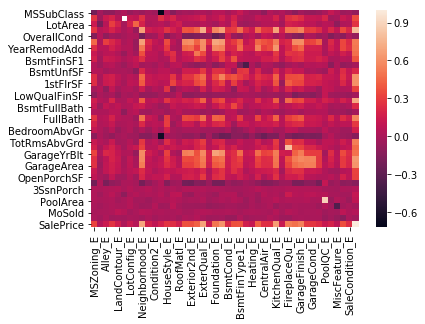

In [22]:
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quant)+1, len(qual_encoded)+1]), index=quant+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quant+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = df_train[q1].corr(df_train[q2])
sns.heatmap(corr)

Finally, a correlation matrix between the quantitative variables and qualitative ones. MsSubclass and total rms above grd both are correlated with condition 2

## Pairplots
comparing saleprices with independent variables

c:\users\aznro\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


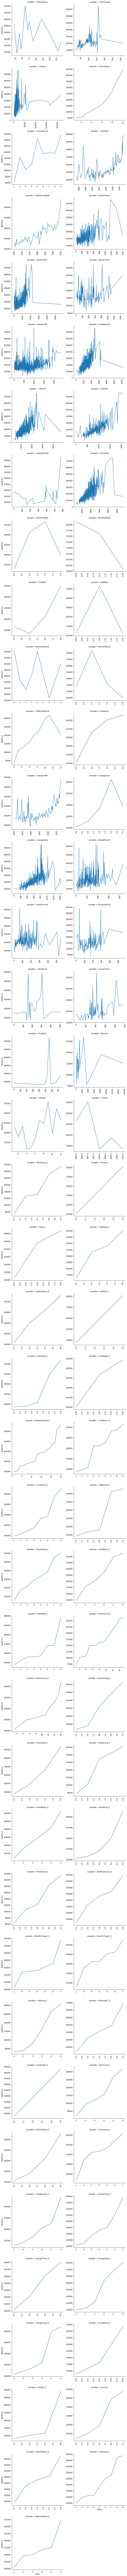

In [23]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=quant+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

There are lots of nonlinearities this may be the cause why some variables wont be selected by Lasso/Lars. Some factors like YearBuilt, 1stFlrSF, 2ndFlrSF, Neighborhood_E look like they would benefit from adding quadratic term to regression. But on the other hand this will most probably provoke overfit.

## Clustering

<class 'numpy.ndarray'>
0.7496324733026797


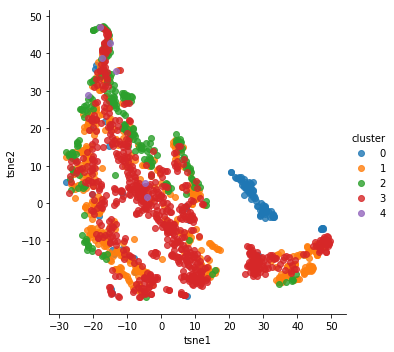

In [24]:
features = quant + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = df_train[features].fillna(0.).values
tsne = model.fit_transform(X)
print(type(tsne))
std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

30 First PCA Components explain 75% of variance. There seems to be some clustering present but it is not enough for segmented regression (piecewise regression).

c:\users\aznro\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


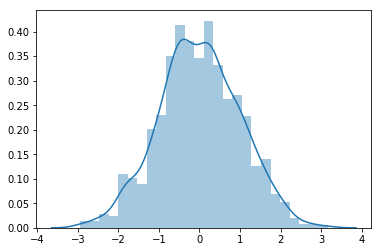

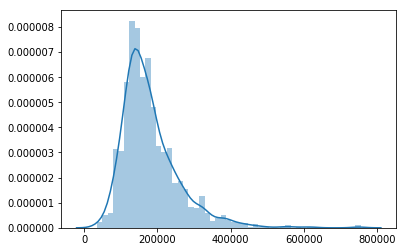

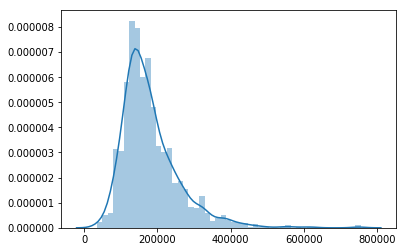

In [26]:
y = df_train['SalePrice'].values
def johnson(y):
    gamma, eta, epsilon, lbda = stats.johnsonsu.fit(y)
    yt = gamma + eta*np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y-gamma)/eta) + epsilon

yt, g, et, ep, l = johnson(y)
yt2 = johnson_inverse(yt, g, et, ep, l)
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.distplot(yt2)
plt.figure(3)
sns.distplot(y)

Here is Johnson Transform of SalePrice. I tried Box Cox, Fisher and Johnson transforms but none of these can beat log in simple linear regression. It is probably because they have tunable parameters that overfit to training data. If there were much more than 1500 instances they could be alternative to log transformation.



In [27]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(feature):
    df_train[feature] = np.log1p(df_train[feature].values)

def quadratic(feature):
    df_train[feature+'2'] = df_train[feature]**2
    
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')

qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']

df_train['HasBasement'] = df_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['HasGarage'] = df_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['Has2ndFloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['HasMasVnr'] = df_train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['HasWoodDeck'] = df_train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['HasPorch'] = df_train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['HasPool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['IsNew'] = df_train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']


features = quant + qual_encoded + boolean + qdr
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = df_train[features].fillna(0.).values
Y = df_train['SalePrice'].values
lasso.fit(X, np.log(Y))

Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)

0.11263269017843047